# Regression Using StatsModels

- Run a regression to find beta and alpha of FB to TSLA
- FB<sub>t</sub> ~ $\beta$ * TSLA<sub>t</sub> + $\alpha$ + e<sub>t</sub>

In [36]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf

In [37]:
tickers = ['META','TSLA']
px = yf.download(tickers, start='2016-01-01')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [38]:
px.tail()

Ticker,META,TSLA
Date,,
2025-01-14 00:00:00+00:00,594.250000,396.359985
2025-01-15 00:00:00+00:00,617.119995,428.220001
2025-01-16 00:00:00+00:00,611.299988,413.820007
2025-01-17 00:00:00+00:00,612.770020,426.500000
2025-01-21 00:00:00+00:00,616.460022,424.070007


In [39]:
# Compute returns
ret = px / px.shift()-1
ret

Ticker,META,TSLA
Date,,
2016-01-04 00:00:00+00:00,NaN,NaN
2016-01-05 00:00:00+00:00,0.004989,0.000090
2016-01-06 00:00:00+00:00,0.002336,-0.019648
2016-01-07 00:00:00+00:00,-0.049043,-0.015477
2016-01-08 00:00:00+00:00,-0.006025,-0.021563
...,...,...
2025-01-14 00:00:00+00:00,-0.023145,-0.017232
2025-01-15 00:00:00+00:00,0.038485,0.080382
2025-01-16 00:00:00+00:00,-0.009431,-0.033628


In [40]:
#set X and Y. Have to add constant
X = ret[['TSLA']]
X = sm.add_constant(X)

Y = ret['META']

In [41]:
print(X)

                           const      TSLA
Date                                      
2016-01-04 00:00:00+00:00    1.0       NaN
2016-01-05 00:00:00+00:00    1.0  0.000090
2016-01-06 00:00:00+00:00    1.0 -0.019648
2016-01-07 00:00:00+00:00    1.0 -0.015477
2016-01-08 00:00:00+00:00    1.0 -0.021563
...                          ...       ...
2025-01-14 00:00:00+00:00    1.0 -0.017232
2025-01-15 00:00:00+00:00    1.0  0.080382
2025-01-16 00:00:00+00:00    1.0 -0.033628
2025-01-17 00:00:00+00:00    1.0  0.030641
2025-01-21 00:00:00+00:00    1.0 -0.005698

[2276 rows x 2 columns]


In [42]:
print(Y)

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.004989
2016-01-06 00:00:00+00:00    0.002336
2016-01-07 00:00:00+00:00   -0.049043
2016-01-08 00:00:00+00:00   -0.006025
                               ...   
2025-01-14 00:00:00+00:00   -0.023145
2025-01-15 00:00:00+00:00    0.038485
2025-01-16 00:00:00+00:00   -0.009431
2025-01-17 00:00:00+00:00    0.002405
2025-01-21 00:00:00+00:00    0.006022
Name: META, Length: 2276, dtype: float64


In [43]:
# results = sm.OLS(Y,X).fit()

In [44]:
X.isna()

,const,TSLA
Date,,
2016-01-04 00:00:00+00:00,False,True
2016-01-05 00:00:00+00:00,False,False
2016-01-06 00:00:00+00:00,False,False
2016-01-07 00:00:00+00:00,False,False
2016-01-08 00:00:00+00:00,False,False
...,...,...
2025-01-14 00:00:00+00:00,False,False
2025-01-15 00:00:00+00:00,False,False
2025-01-16 00:00:00+00:00,False,False


In [45]:
Y.isna()

Date
2016-01-04 00:00:00+00:00     True
2016-01-05 00:00:00+00:00    False
2016-01-06 00:00:00+00:00    False
2016-01-07 00:00:00+00:00    False
2016-01-08 00:00:00+00:00    False
                             ...  
2025-01-14 00:00:00+00:00    False
2025-01-15 00:00:00+00:00    False
2025-01-16 00:00:00+00:00    False
2025-01-17 00:00:00+00:00    False
2025-01-21 00:00:00+00:00    False
Name: META, Length: 2276, dtype: bool

In [48]:
X = X.dropna()
Y = Y.dropna()

results = sm.OLS(Y,X).fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     249.6
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           2.00e-53
Time:                        17:56:11   Log-Likelihood:                 5349.1
No. Observations:                2275   AIC:                        -1.069e+04
Df Residuals:                    2273   BIC:                        -1.068e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.333      0.183      -0.000       0.002
TSLA           0.2061      0.013     15.798      0.000       0.180       0.232
==============================================================================
Omnibus:                      653.322   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58854.228
Skew:                          -0.296   Prob(JB):                         0.00
Kurtosis:                      27.910   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
results.params

const    0.000646
TSLA     0.206053
dtype: float64

In [52]:
results.tvalues

const     1.333349
TSLA     15.798394
dtype: float64

Reconstruct FB

- FB<sub>t</sub> ~ $\beta$ * TSLA<sub>t</sub> + $\alpha$ + e<sub>t</sub>

In [55]:
FB = results.params['TSLA']*X['TSLA'] + results.params['const'] + results.resid

In [58]:
(FB-Y).abs().sum()

np.float64(5.221517662690189e-16)

In [60]:
beta_contr = results.params['TSLA']*X['TSLA']
prediction = results.params['TSLA']*X['TSLA'] + results.params['const']
alpha_contr = results.params['const'] + results.resid

In [61]:
alpha_contr

Date
2016-01-05 00:00:00+00:00    0.004971
2016-01-06 00:00:00+00:00    0.006385
2016-01-07 00:00:00+00:00   -0.045854
2016-01-08 00:00:00+00:00   -0.001582
2016-01-11 00:00:00+00:00    0.004926
                               ...   
2025-01-14 00:00:00+00:00   -0.019595
2025-01-15 00:00:00+00:00    0.021923
2025-01-16 00:00:00+00:00   -0.002502
2025-01-17 00:00:00+00:00   -0.003909
2025-01-21 00:00:00+00:00    0.007196
Length: 2275, dtype: float64

<Axes: xlabel='Date'>

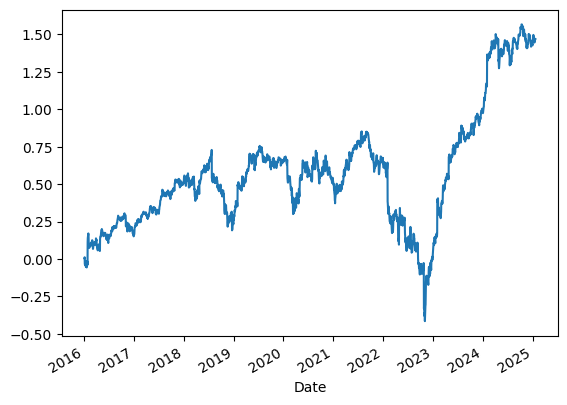

In [63]:
alpha_contr.cumsum().plot()

In [64]:
alpha_contr.corr(X['TSLA'])

np.float64(1.3773011205120762e-16)

In [65]:
alpha_contr.mean()

np.float64(0.0006456540852150004)

In [67]:
results.tvalues['const']

np.float64(1.3333486429625172)